In [2]:
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime

In [3]:
#Setting the end date to today
yf.pdr_override() #
start= datetime.datetime(2021, 1, 1)
end =datetime.datetime(2023, 9,6)
CRYPTO='BTC-USD'


In [4]:
ticker = yf.Ticker('BTC-USD')
df = ticker.history(period="D", start=start, end=end)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-01 00:00:00+00:00,28994.009766,29600.626953,28803.585938,29374.152344,40730301359,0.0,0.0
2021-01-02 00:00:00+00:00,29376.455078,33155.117188,29091.181641,32127.267578,67865420765,0.0,0.0
2021-01-03 00:00:00+00:00,32129.408203,34608.558594,32052.316406,32782.023438,78665235202,0.0,0.0
2021-01-04 00:00:00+00:00,32810.949219,33440.218750,28722.755859,31971.914062,81163475344,0.0,0.0
2021-01-05 00:00:00+00:00,31977.041016,34437.589844,30221.187500,33992.429688,67547324782,0.0,0.0
...,...,...,...,...,...,...,...
2023-09-01 00:00:00+00:00,25934.021484,26125.869141,25362.609375,25800.724609,17202862221,0.0,0.0
2023-09-02 00:00:00+00:00,25800.910156,25970.285156,25753.093750,25868.798828,10100387473,0.0,0.0
2023-09-03 00:00:00+00:00,25869.472656,26087.148438,25817.031250,25969.566406,8962524523,0.0,0.0


<Axes: xlabel='Date'>

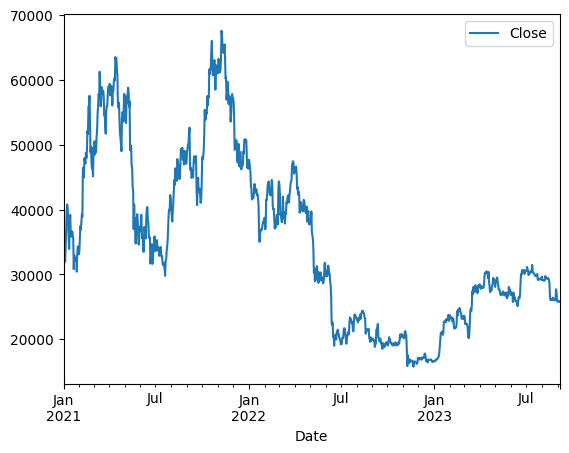

In [5]:
df['Close'].plot(legend = True)

In [6]:
df.reset_index(inplace=True)

In [7]:
df=df.rename(columns={'Date': 'time'})

In [8]:
col=[ 'Open', 'High', 'Low', 'Volume','Dividends', 'Stock Splits']
time_series_df=df.drop(col,axis=1)
time_series_df

,time,Close
0,2021-01-01 00:00:00+00:00,29374.152344
1,2021-01-02 00:00:00+00:00,32127.267578
2,2021-01-03 00:00:00+00:00,32782.023438
3,2021-01-04 00:00:00+00:00,31971.914062
4,2021-01-05 00:00:00+00:00,33992.429688
...,...,...
973,2023-09-01 00:00:00+00:00,25800.724609
974,2023-09-02 00:00:00+00:00,25868.798828
975,2023-09-03 00:00:00+00:00,25969.566406
976,2023-09-04 00:00:00+00:00,25812.416016


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10256\4231390551.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['signal'][i] = 1  # Buy signal
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10256\4231390551.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['signal'][i] = -1  # Sell signal
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10256\4231390551.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

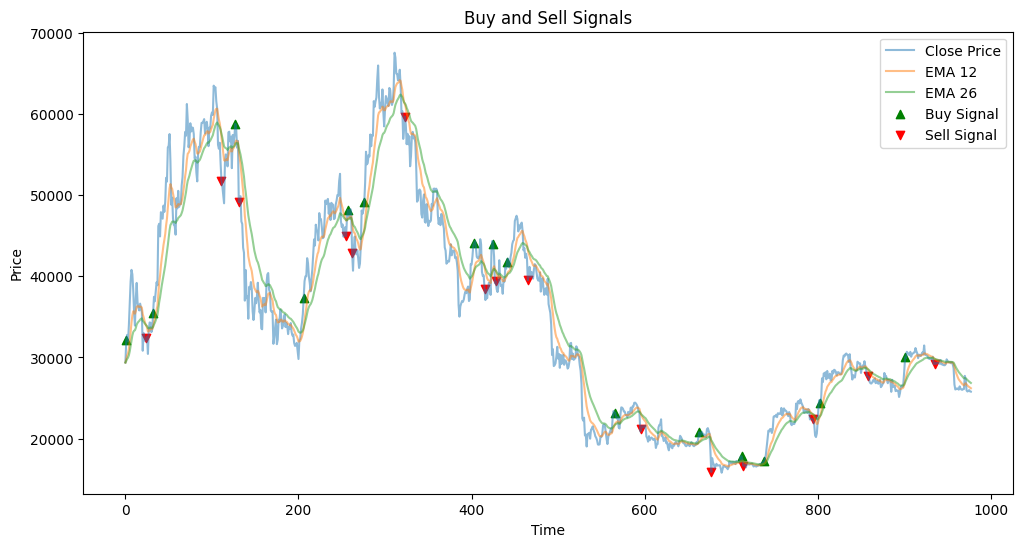

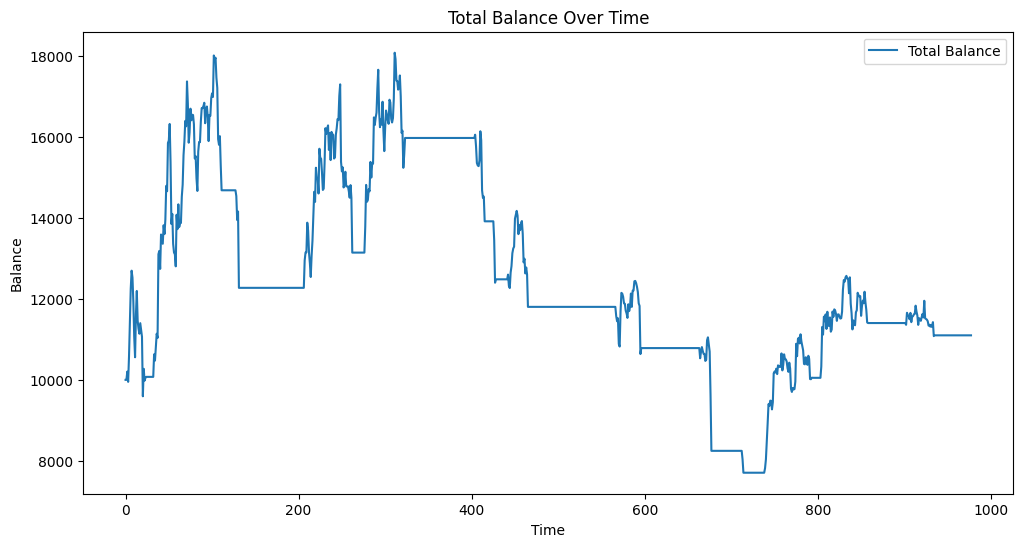

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV file
data = time_series_df.copy()

# Calculate EMAs
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()

# Generate signals
data['signal'] = 0
previous_signal = 0

for i in range(1, len(data)):
    if data['EMA_12'][i] > data['EMA_26'][i] and previous_signal != 1:
        data['signal'][i] = 1  # Buy signal
        previous_signal = 1
    elif data['EMA_26'][i] > data['EMA_12'][i] and previous_signal != -1:
        data['signal'][i] = -1  # Sell signal
        previous_signal = -1

# Initialize balance and position tracking
initial_balance = 10000  # Starting balance in dollars
balance = initial_balance
position = 0  # Current position
data['balance'] = initial_balance

# Backtest the strategy
for i in range(1, len(data)):
    if data['signal'][i] == 1 and position <= 0:
        # Buy
        position += balance / data['Close'][i]
        balance = 0
    elif data['signal'][i] == -1 and position > 0:
        # Sell
        balance += position * data['Close'][i]
        position = 0
    data['balance'][i] = balance + position * data['Close'][i]

# Plot Buy/Sell Signals on Price
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(data['EMA_12'], label='EMA 12', alpha=0.5)
plt.plot(data['EMA_26'], label='EMA 26', alpha=0.5)
plt.scatter(data.loc[data['signal'] == 1].index, data.loc[data['signal'] == 1]['Close'], label='Buy Signal', marker='^', color='green')
plt.scatter(data.loc[data['signal'] == -1].index, data.loc[data['signal'] == -1]['Close'], label='Sell Signal', marker='v', color='red')
plt.title('Buy and Sell Signals')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

# Plot Total Balance Over Time
plt.figure(figsize=(12, 6))
plt.plot(data['balance'], label='Total Balance')
plt.title('Total Balance Over Time')
plt.xlabel('Time')
plt.ylabel('Balance')
plt.legend()

plt.show()


In [10]:
price='Close'


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10256\271203067.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['signal'].iloc[i] = 1  # Buy signal
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10256\271203067.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['signal'].iloc[i] = -1  # Sell signal
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10256\271203067.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

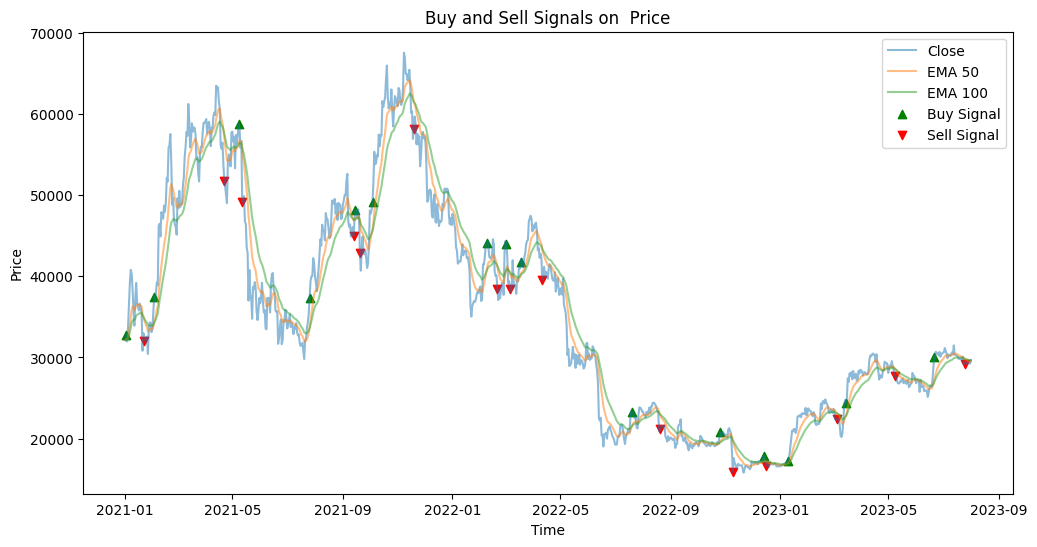

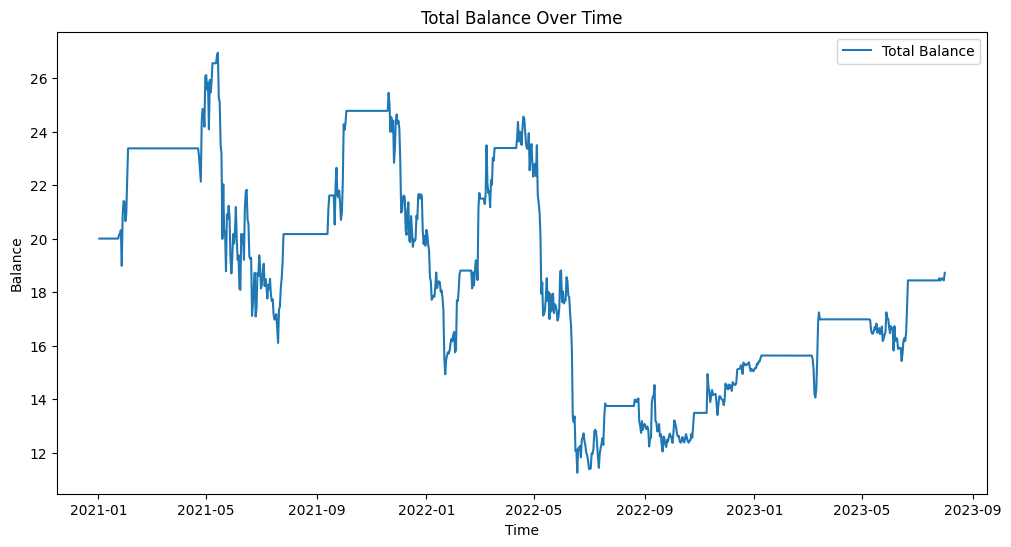

In [11]:
# invert price action

import pandas as pd
import matplotlib.pyplot as plt

# Load the provided CSV file
#file_path = 'df_jepx_spotsum.csv'
data = time_series_df.copy()

# Preparing the data
data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)


# Define the date range for backtesting
start_date = '2021-01-02'  # Replace with your start date
end_date = '2023-08-01'    # Replace with your end date
data = data.loc[start_date:end_date]

# Calculate EMAs
data['EMA_12'] = data[price].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data[price].ewm(span=25, adjust=False).mean()

# Generate signals
data['signal'] = 0
previous_signal = 0

for i in range(1, len(data)):
    if data['EMA_12'].iloc[i] > data['EMA_26'].iloc[i] and previous_signal != 1:
        data['signal'].iloc[i] = 1  # Buy signal
        previous_signal = 1
    elif data['EMA_26'].iloc[i] > data['EMA_12'].iloc[i] and previous_signal != -1:
        data['signal'].iloc[i] = -1  # Sell signal
        previous_signal = -1

# Initialize balance and position tracking
initial_balance = 20 # Starting balance in dollars
balance = initial_balance
position = 0  # Current position
data['balance'] = initial_balance

# Backtest the strategy
for i in range(1, len(data)):
    if data['signal'].iloc[i] == -1 and position <= 0:
        # Buy
        position += balance / data[price].iloc[i]
        balance = 0
    elif data['signal'].iloc[i] == 1 and position > 0:
        # Sell
        balance += position * data[price].iloc[i]
        position = 0
    data['balance'].iloc[i] = balance + position * data[price].iloc[i]

# Plot Buy/Sell Signals on Price
plt.figure(figsize=(12, 6))
plt.plot(data[price], label=price, alpha=0.5)
plt.plot(data['EMA_12'], label='EMA 50', alpha=0.5)
plt.plot(data['EMA_26'], label='EMA 100', alpha=0.5)
plt.scatter(data.loc[data['signal'] == 1].index, data.loc[data['signal'] == 1][price], label='Buy Signal', marker='^', color='green')
plt.scatter(data.loc[data['signal'] == -1].index, data.loc[data['signal'] == -1][price], label='Sell Signal', marker='v', color='red')
plt.title('Buy and Sell Signals on  Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

# Plot Total Balance Over Time
plt.figure(figsize=(12, 6))
plt.plot(data['balance'], label='Total Balance')
plt.title('Total Balance Over Time')
plt.xlabel('Time')
plt.ylabel('Balance')
plt.legend()

plt.show()
